# <span style='color:red'>Quantitative Investing with Python</span>

### Professor Juhani Linnainmaa

Dartmouth College and Kepos Capital (Co-Director of Research)

--- 

# **Topic 2:** Working with Pandas Dataframes

- Pandas is Python package

  - A package is a collection of additional objects that extends the capability of the basic Python
  - E.g., if you want to create nicer plots, you might use *matplotlib* package; if you want to do machine learning, you'd maybe use *sklearn*
  
  
- Pandas is the most popular package for statistics
  - It has finance origins: 
  
  
  ```
  Wes McKinney started building what would become Pandas at AQR Capital while he was a researcher there from 2007 to 2010.
  ```

- The data in Pandas is organized in DataFrames (or Series)
- In this lecture we load some data and go through some basics of how to view, manipulate, and plot the data we have
- I will cover **a lot** of ground
  - However, I'm confident in that *everything* that I do here is something that quantitative researchers/scientists working with Pandas would use daily
  - It will be useful to see just how flexible Pandas can be
  - In terms of quantitative investing, Python allows you to think about what you want to do instead of worrying about *how* you can implement your ideas  
- A few words of comfort:
  1. You don't need to memorize things. When you first start working with Python, you'll constantly check the syntax and go back and see how something is done. But as you keep doing it, the things that matter will stick.
  2. There is no real-time coding test in real life so you can always look things up
     - A Google search is typically your friend. Nowadays an LLM, possibly trained specifically for coding, is a very powerful tool.

We begin by importing a few packages that we need

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime, timedelta

## Use Yahoo Finance API to download daily stock prices

- We need to define 
  1. ticker symbols for the stocks we want
  2. the sample period we want to cover
- Tickers will be a list of strings
- The start and end dates are "datetimes", which I construct using the datetime package

In [2]:
# Define the ticker symbols for Apple and Google
ticker_symbols = ['AAPL', 'GOOGL', 'TSLA']

# Define the start and end dates for the data
end_date = datetime.today()
start_date = end_date - timedelta(days=5 * 365)  # Five years ago

# Download the data for each stock
stock_data = yf.download(ticker_symbols, start=start_date, end=end_date)

# Display the first few rows of the downloaded data
stock_data.head()

[*********************100%***********************]  3 of 3 completed


Adj Close                            Close                        \
                 AAPL      GOOGL       TSLA       AAPL      GOOGL       TSLA   
Date                                                                           
2019-01-17  37.399033  54.956001  23.153999  38.965000  54.956001  23.153999   
2019-01-18  37.629387  55.365002  20.150667  39.205002  55.365002  20.150667   
2019-01-22  36.784752  53.931499  19.927999  38.325001  53.931499  19.927999   
2019-01-23  36.933517  54.220501  19.172667  38.480000  54.220501  19.172667   
2019-01-24  36.640781  54.200001  19.434000  38.174999  54.200001  19.434000   

                 High                              Low                        \
                 AAPL      GOOGL       TSLA       AAPL      GOOGL       TSLA   
Date                                                                           
2019-01-17  39.415001  55.035000  23.433332  38.314999  54.162998  22.943333   
2019-01-18  39.470001  55.900002  21.808666  38.994999  54.964001  19.982000   
2019-01-22  39.182499  54.948502  20.533333  38.154999  53.544498  19.700001   
2019-01-23  38.785000  54.647499  19.633333  37.924999  53.378502  18.779333   
2019-01-24  38.619999  54.400002  19.578667  37.935001  53.500999  18.618668   

                 Open                           Volume                       
                 AAPL      GOOGL       TSLA       AAPL     GOOGL       TSLA  
Date                                                                         
2019-01-17  38.549999  54.399502  23.080667  119284800  24896000   55150500  
2019-01-18  39.375000  55.429501  21.533333  135004000  44892000  362262000  
2019-01-22  39.102501  54.799999  20.321333  121576000  39632000  181000500  
2019-01-23  38.537498  54.342999  19.500000   92522400  25194000  187950000  
2019-01-24  38.527500  54.125500  18.868668  101766000  29114000  120183000

# Dataframe

The main object for storing data in Pandas is a dataframe. You can think of it as being a 2D object with a horizontal and vertical axises. 
- These axises are indexed 0 and 1. The vertical axis is called "index" and the horizontal axis (across columns) is called "columns"

We can get the contents of these indices from the stock_data object:  

In [3]:
stock_data.index

DatetimeIndex(['2019-01-17', '2019-01-18', '2019-01-22', '2019-01-23',
               '2019-01-24', '2019-01-25', '2019-01-28', '2019-01-29',
               '2019-01-30', '2019-01-31',
               ...
               '2023-12-29', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-08', '2024-01-09', '2024-01-10',
               '2024-01-11', '2024-01-12'],
              dtype='datetime64[ns]', name='Date', length=1256, freq=None)

In [4]:
stock_data.columns

MultiIndex([('Adj Close',  'AAPL'),
            ('Adj Close', 'GOOGL'),
            ('Adj Close',  'TSLA'),
            (    'Close',  'AAPL'),
            (    'Close', 'GOOGL'),
            (    'Close',  'TSLA'),
            (     'High',  'AAPL'),
            (     'High', 'GOOGL'),
            (     'High',  'TSLA'),
            (      'Low',  'AAPL'),
            (      'Low', 'GOOGL'),
            (      'Low',  'TSLA'),
            (     'Open',  'AAPL'),
            (     'Open', 'GOOGL'),
            (     'Open',  'TSLA'),
            (   'Volume',  'AAPL'),
            (   'Volume', 'GOOGL'),
            (   'Volume',  'TSLA')],
           )

Our index has only one "level"; it is one series of dates.

Our columns, however, have two levels. This is known as a **MultiIndex**

To start things simple, let's create a simpler dataframe that only keeps the "Adj Close" information for each stock.
- Adj Close keeps track of dividends, splits, and other corporate events and so if we want to compute returns, we want to use this column 

Method .xs() ("cross-section") let's us extract this info easily. I just need to tell (a) what label I want, (b) which axis I'm looking at, and (c) what level I'm looking at

In [5]:
adj_close = stock_data.xs('Adj Close', axis=1, level=0)
adj_close

,AAPL,GOOGL,TSLA
Date,,,
2019-01-17,37.399033,54.956001,23.153999
2019-01-18,37.629387,55.365002,20.150667
2019-01-22,36.784752,53.931499,19.927999
2019-01-23,36.933517,54.220501,19.172667
2019-01-24,36.640781,54.200001,19.434000
...,...,...,...
2024-01-08,185.559998,138.839996,240.449997
2024-01-09,185.139999,140.949997,234.960007
2024-01-10,186.190002,142.279999,233.940002


If we want to do fancy visualizations, we might use some other Python packages

However, for most of the data work where the point is not about making the prettiest possible graph, Pandas integration with matplotlib is enough--and it is convenient

I can plot some/all of the data by just a calling the plot() method of the DataFrame:

<AxesSubplot:xlabel='Date'>

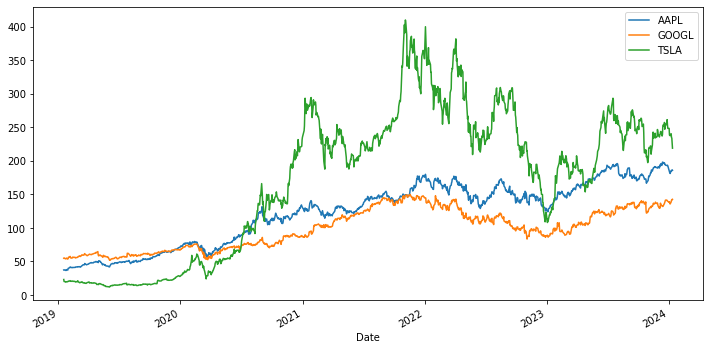

In [6]:
adj_close.plot(figsize=(12,6))

## Creating new columns

You can create new columns based on the other columns

For example, your new column could be, say, the sum of some other columns  

In terms of syntax, we can think of columns as being a collection such as a dictionary or a list and we create a new entry for what we want:

In [7]:
adj_close['apple_plus_tesla'] = adj_close['AAPL'] + adj_close['TSLA']
adj_close.tail(5)

,AAPL,GOOGL,TSLA,apple_plus_tesla
Date,,,,
2024-01-08,185.559998,138.839996,240.449997,426.009995
2024-01-09,185.139999,140.949997,234.960007,420.100006
2024-01-10,186.190002,142.279999,233.940002,420.130005
2024-01-11,185.589996,142.080002,227.220001,412.809998
2024-01-12,185.919998,142.649994,218.889999,404.809998


There are also some simple methods for creating additional statistics. 

Let me first drop the non-sense column that is just created -- there is an intuitive drop-method for doing so -- and then create a price-weighted index of the three stocks

Note: When I drop the unnecessary column, I modify the dataframe *inplace*. I personally prefer to do it as

```df = df.drop(columns='col1')```

but it is just a personal preference.

In [8]:
adj_close.drop(columns='apple_plus_tesla', inplace=True)
adj_close['index'] = adj_close.mean(axis=1)

As you might infer from this, my new column is the average of the three stock prices each day

Because I want to compute the average for each day, I'm taking the average over columns -- which is why axis=1 (columns)

If I want to plot just this column, I can just refer to that column and plot it:

Date
2024-01-08    188.283330
2024-01-09    187.016668
2024-01-10    187.470001
2024-01-11    184.963333
2024-01-12    182.486664
Name: index, dtype: float64


<AxesSubplot:xlabel='Date'>

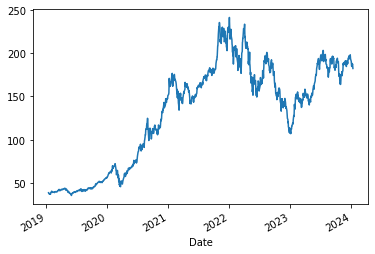

In [9]:
print(adj_close['index'].tail())
adj_close['index'].plot()

Note that when I get just one column from a dataframe -- so that there is just one series of numbers -- it is no longer a DataFrame object. It is now a Series. A Python function ```type``` can be used to figure this information out:

In [10]:
my_str = 'this is a string so its type should be "str"'

print(type(my_str))
print('\nWhat are the other objects?\n')
print(type(adj_close))
print(type(adj_close['index']))

<class 'str'>

What are the other objects?

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


The fact that a DataFrame automatically 'squeezes' down into a Series is sometimes inconvenient. If you want to insist that it doesn't do so, you can either use a list for columns (even if you have just one column for the list) or immediately convert the Series back into a dataframe:

In [11]:
print('This is still a DataFrame because we index with a list:\n')
display(adj_close[['index']].tail())

print('This is a DataFrame because we convert the Series back into a (Data)Frame:\n')
display(adj_close['index'].to_frame().tail())

This is still a DataFrame because we index with a list:



,index
Date,
2024-01-08,188.283330
2024-01-09,187.016668
2024-01-10,187.470001
2024-01-11,184.963333
2024-01-12,182.486664


This is a DataFrame because we convert the Series back into a (Data)Frame:



,index
Date,
2024-01-08,188.283330
2024-01-09,187.016668
2024-01-10,187.470001
2024-01-11,184.963333
2024-01-12,182.486664


## Viewing/splicing the data

There are a few key methods for taking subsets of data:

- use the column name as a key (we already did this before)
- .loc[] is used to get data based on *labels* (e.g., names of columns or dates in the index)
- .iloc[] is used to get data based on *indices*
- .xs() is used to get one cross-section of data based on a label

We can *slice* by giving the start and points

In [12]:
adj_close.loc['2024-01-08':'2024-01-10', ['AAPL', 'GOOGL']]

,AAPL,GOOGL
Date,,
2024-01-08,185.559998,138.839996
2024-01-09,185.139999,140.949997
2024-01-10,186.190002,142.279999


In [13]:
adj_close.iloc[10:13, :2]

,AAPL,GOOGL
Date,,
2019-02-01,39.956924,55.931000
2019-02-04,41.091908,57.070999
2019-02-05,41.794960,57.593498


Pandas is smart with dates and so you can get years or months etc. by just calling with partial date labels. Here, I don't specify the columns at all so I get all of them

In [14]:
adj_close.loc['2023-12']

,AAPL,GOOGL,TSLA,index
Date,,,,
2023-12-01,191.240005,131.860001,238.830002,187.310003
2023-12-04,189.429993,129.270004,235.580002,184.760000
2023-12-05,193.419998,130.990005,238.720001,187.710002
2023-12-06,192.320007,130.020004,239.369995,187.236669
2023-12-07,194.270004,136.929993,242.639999,191.279999
2023-12-08,195.710007,134.990005,243.839996,191.513336
2023-12-11,193.179993,133.289993,239.740005,188.736664
2023-12-12,194.710007,132.520004,237.009995,188.080002
2023-12-13,197.960007,132.570007,239.289993,189.940002


## A warning about "views" and the copies/by reference issue

If you take a subset of data and make changes to it, you'll likely make changes to the *original* data because you haven't created a copy

Pandas might warn you about it when you make changes to "views" in a way that pandas views as being risky

So if you see a warning about views, it means that (1) you are making changes through a view and (2) the operation might not be entirely safe

**An educational story:** A quantitative portfolio manager supposedly lost millions of dollars about a decade ago over the span of few months because the columns in the underlying data had swapped but the manager called them based on their indices, not labels. He therefore did not realize that he was trading on wrong data 

In [15]:
# Create a copy of the dataframe so that I don't overwrite it here
adj_close2 = adj_close.copy()

data_2024 = adj_close2.loc['2024']
print(data_2024.head())
print('\nLet\'s change it a bit and reprint:\n')
data_2024.iloc[:2,:2] = 0
print(data_2024.head())
print('\nLet\'s print the original dataframe:\n')
print(adj_close2.loc['2024'].head())

                  AAPL       GOOGL        TSLA       index
Date                                                      
2024-01-02  185.639999  138.169998  248.419998  190.743332
2024-01-03  184.250000  138.919998  238.449997  187.206665
2024-01-04  181.910004  136.389999  237.929993  185.409999
2024-01-05  181.179993  135.729996  237.490005  184.799998
2024-01-08  185.559998  138.839996  240.449997  188.283330

Let's change it a bit and reprint:

                  AAPL       GOOGL        TSLA       index
Date                                                      
2024-01-02    0.000000    0.000000  248.419998  190.743332
2024-01-03    0.000000    0.000000  238.449997  187.206665
2024-01-04  181.910004  136.389999  237.929993  185.409999
2024-01-05  181.179993  135.729996  237.490005  184.799998
2024-01-08  185.559998  138.839996  240.449997  188.283330

Let's print the original dataframe:

                  AAPL       GOOGL        TSLA       index
Date                                    

If you want to rotate your data, you can TRANSPOSE it by calling the .T method -- we think of the data as being a matrix and this flips the rows and columns

In [16]:
adj_close.T

Date,2019-01-17,2019-01-18,2019-01-22,2019-01-23,2019-01-24,2019-01-25,2019-01-28,2019-01-29,2019-01-30,2019-01-31,...,2023-12-29,2024-01-02,2024-01-03,2024-01-04,2024-01-05,2024-01-08,2024-01-09,2024-01-10,2024-01-11,2024-01-12
AAPL,37.399033,37.629387,36.784752,36.933517,36.640781,37.854935,37.504612,37.115883,39.652191,39.937729,...,192.529999,185.639999,184.250000,181.910004,181.179993,185.559998,185.139999,186.190002,185.589996,185.919998
GOOGL,54.956001,55.365002,53.931499,54.220501,54.200001,55.075500,53.993000,53.502998,54.899502,56.294498,...,139.690002,138.169998,138.919998,136.389999,135.729996,138.839996,140.949997,142.279999,142.080002,142.649994
TSLA,23.153999,20.150667,19.927999,19.172667,19.434000,19.802668,19.758667,19.830667,20.584667,20.468000,...,248.479996,248.419998,238.449997,237.929993,237.490005,240.449997,234.960007,233.940002,227.220001,218.889999
index,38.503011,37.715019,36.881417,36.775562,36.758261,37.577701,37.085426,36.816516,38.378787,38.900076,...,193.566666,190.743332,187.206665,185.409999,184.799998,188.283330,187.016668,187.470001,184.963333,182.486664


If you have a multiindex, you can use two commands for reshaping the data so that you move levels from the index to columns or vice versa:

1. Unstack moves levels from the index to columns. By default, you move the innermost level
2. Stack moves levels from the columns to the index. By default, you move the lowest level

Consider the original data:

In [17]:
stock_data.head(5)

Adj Close                            Close                        \
                 AAPL      GOOGL       TSLA       AAPL      GOOGL       TSLA   
Date                                                                           
2019-01-17  37.399033  54.956001  23.153999  38.965000  54.956001  23.153999   
2019-01-18  37.629387  55.365002  20.150667  39.205002  55.365002  20.150667   
2019-01-22  36.784752  53.931499  19.927999  38.325001  53.931499  19.927999   
2019-01-23  36.933517  54.220501  19.172667  38.480000  54.220501  19.172667   
2019-01-24  36.640781  54.200001  19.434000  38.174999  54.200001  19.434000   

                 High                              Low                        \
                 AAPL      GOOGL       TSLA       AAPL      GOOGL       TSLA   
Date                                                                           
2019-01-17  39.415001  55.035000  23.433332  38.314999  54.162998  22.943333   
2019-01-18  39.470001  55.900002  21.808666  38.994999  54.964001  19.982000   
2019-01-22  39.182499  54.948502  20.533333  38.154999  53.544498  19.700001   
2019-01-23  38.785000  54.647499  19.633333  37.924999  53.378502  18.779333   
2019-01-24  38.619999  54.400002  19.578667  37.935001  53.500999  18.618668   

                 Open                           Volume                       
                 AAPL      GOOGL       TSLA       AAPL     GOOGL       TSLA  
Date                                                                         
2019-01-17  38.549999  54.399502  23.080667  119284800  24896000   55150500  
2019-01-18  39.375000  55.429501  21.533333  135004000  44892000  362262000  
2019-01-22  39.102501  54.799999  20.321333  121576000  39632000  181000500  
2019-01-23  38.537498  54.342999  19.500000   92522400  25194000  187950000  
2019-01-24  38.527500  54.125500  18.868668  101766000  29114000  120183000

In [18]:
stock_data.stack().head(5)

Adj Close      Close       High        Low       Open  \
Date                                                                      
2019-01-17 AAPL   37.399033  38.965000  39.415001  38.314999  38.549999   
           GOOGL  54.956001  54.956001  55.035000  54.162998  54.399502   
           TSLA   23.153999  23.153999  23.433332  22.943333  23.080667   
2019-01-18 AAPL   37.629387  39.205002  39.470001  38.994999  39.375000   
           GOOGL  55.365002  55.365002  55.900002  54.964001  55.429501   

                     Volume  
Date                         
2019-01-17 AAPL   119284800  
           GOOGL   24896000  
           TSLA    55150500  
2019-01-18 AAPL   135004000  
           GOOGL   44892000

In [19]:
stock_data.stack(level=0).head(5)

AAPL      GOOGL       TSLA
Date                                                 
2019-01-17 Adj Close  37.399033  54.956001  23.153999
           Close      38.965000  54.956001  23.153999
           High       39.415001  55.035000  23.433332
           Low        38.314999  54.162998  22.943333
           Open       38.549999  54.399502  23.080667

To illustrate unstacking, let me take what we have above and then unstack Dates to columns. This is METHOD CHAINING, which is something we have already done a bit: 

In [20]:
stock_data.stack(level=0).unstack(level=0)

AAPL                                            \
Date         2019-01-17    2019-01-18    2019-01-22    2019-01-23   
Adj Close  3.739903e+01  3.762939e+01  3.678475e+01  3.693352e+01   
Close      3.896500e+01  3.920500e+01  3.832500e+01  3.848000e+01   
High       3.941500e+01  3.947000e+01  3.918250e+01  3.878500e+01   
Low        3.831500e+01  3.899500e+01  3.815500e+01  3.792500e+01   
Open       3.855000e+01  3.937500e+01  3.910250e+01  3.853750e+01   
Volume     1.192848e+08  1.350040e+08  1.215760e+08  9.252240e+07   

                                                                   \
Date         2019-01-24    2019-01-25    2019-01-28    2019-01-29   
Adj Close  3.664078e+01  3.785493e+01  3.750461e+01  3.711588e+01   
Close      3.817500e+01  3.944000e+01  3.907500e+01  3.867000e+01   
High       3.862000e+01  3.953250e+01  3.908250e+01  3.953250e+01   
Low        3.793500e+01  3.858000e+01  3.841500e+01  3.852750e+01   
Open       3.852750e+01  3.887000e+01  3.894750e+01  3.906250e+01   
Volume     1.017660e+08  1.341420e+08  1.047684e+08  1.663488e+08   

                                       ...          TSLA                \
Date         2019-01-30    2019-01-31  ...    2023-12-29    2024-01-02   
Adj Close  3.965219e+01  3.993773e+01  ...  2.484800e+02  2.484200e+02   
Close      4.131250e+01  4.161000e+01  ...  2.484800e+02  2.484200e+02   
High       4.153750e+01  4.225000e+01  ...  2.551900e+02  2.512500e+02   
Low        4.005750e+01  4.114000e+01  ...  2.474300e+02  2.444100e+02   
Open       4.081250e+01  4.152750e+01  ...  2.551000e+02  2.500800e+02   
Volume     2.444392e+08  1.629584e+08  ...  1.006153e+08  1.046542e+08   

                                                                   \
Date         2024-01-03    2024-01-04    2024-01-05    2024-01-08   
Adj Close  2.384500e+02  2.379300e+02  2.374900e+02  2.404500e+02   
Close      2.384500e+02  2.379300e+02  2.374900e+02  2.404500e+02   
High       2.456800e+02  2.427000e+02  2.401200e+02  2.412500e+02   
Low        2.363200e+02  2.377300e+02  2.349000e+02  2.353000e+02   
Open       2.449800e+02  2.392500e+02  2.368600e+02  2.361400e+02   
Volume     1.210826e+08  1.026293e+08  9.237940e+07  8.516660e+07   

                                                                   
Date         2024-01-09    2024-01-10    2024-01-11    2024-01-12  
Adj Close  2.349600e+02  2.339400e+02  2.272200e+02  2.188900e+02  
Close      2.349600e+02  2.339400e+02  2.272200e+02  2.188900e+02  
High       2.389600e+02  2.355000e+02  2.309300e+02  2.253400e+02  
Low        2.320400e+02  2.312900e+02  2.253700e+02  2.171500e+02  
Open       2.381100e+02  2.351000e+02  2.305700e+02  2.200800e+02  
Volume     9.670570e+07  9.162850e+07  1.058736e+08  1.228890e+08  

[6 rows x 3768 columns]

## Other ways of reshaping data and some notes

- You can use ```swaplevel``` method to swap levels
- You can use ```pivot``` method to create a new dataframe based on counts
- You can refer to different levels using the names of these levels instead of indices (always safer!)

## Let me compute returns as percentage changes in adj_close

There is a convenience method .pct_change() for doing so

In [21]:
returns = adj_close.pct_change()
returns.head()

,AAPL,GOOGL,TSLA,index
Date,,,,
2019-01-17,NaN,NaN,NaN,NaN
2019-01-18,0.006159,0.007442,-0.129711,-0.020466
2019-01-22,-0.022446,-0.025892,-0.011050,-0.022103
2019-01-23,0.004044,0.005359,-0.037903,-0.002870
2019-01-24,-0.007926,-0.000378,0.013631,-0.000470


If we want to view data based on some condition, we can filter the data 

For example, if we want to have days when AAPL's return is positive, we can create a column with True/False values by writing

```returns['AAPL'] > 0```

We can use this as an index and, in the style of Matlab, Pandas will understand that we are filtering columns

In [22]:
returns[returns['AAPL'] > 0]

,AAPL,GOOGL,TSLA,index
Date,,,,
2019-01-18,0.006159,0.007442,-0.129711,-0.020466
2019-01-23,0.004044,0.005359,-0.037903,-0.002870
2019-01-25,0.033137,0.016153,0.018970,0.022293
2019-01-30,0.068335,0.026101,0.038022,0.042434
2019-01-31,0.007201,0.025410,-0.005668,0.013583
...,...,...,...,...
2023-12-27,0.000518,-0.008126,0.018822,0.006394
2023-12-28,0.002226,-0.000997,-0.031594,-0.013396
2024-01-08,0.024175,0.022913,0.012464,0.018849


## Modifying DataFrames

We can modify DataFrames by, e.g.:

1. Creating new columns (we did this above)
2. Replacing values using .loc or .iloc (we did this above)
3. Replacing values based on some rule

We can also 'rename' columns or index

Starting rom renaming columns, I might to have company names instead of ticker symbols. I could use a dictionary to tell Python/Pandas what replacements I want to do:

In [23]:
rename_dict = {'AAPL': 'Apple', 'GOOGL': 'Google', 'TSLA': 'Tesla'}
returns.rename(columns=rename_dict)

,Apple,Google,Tesla,index
Date,,,,
2019-01-17,NaN,NaN,NaN,NaN
2019-01-18,0.006159,0.007442,-0.129711,-0.020466
2019-01-22,-0.022446,-0.025892,-0.011050,-0.022103
2019-01-23,0.004044,0.005359,-0.037903,-0.002870
2019-01-24,-0.007926,-0.000378,0.013631,-0.000470
...,...,...,...,...
2024-01-08,0.024175,0.022913,0.012464,0.018849
2024-01-09,-0.002263,0.015197,-0.022832,-0.006727
2024-01-10,0.005671,0.009436,-0.004341,0.002424


Notes:

1. Pandas is smart in that it notices that I'm giving it a dictionary
2. I did *not* set inplace=True, so we did not 'save' this modification to the dataframe

If we don't say "index" or "columns", we are making changes to the values in the DataFrame

Given the nature of these data, this is harder to demonstrate, but the example below shows that we can replace specific values with something else

In [24]:
small_data = stock_data.iloc[:5,:5]
small_data

Adj Close                            Close           
                 AAPL      GOOGL       TSLA       AAPL      GOOGL
Date                                                             
2019-01-17  37.399033  54.956001  23.153999  38.965000  54.956001
2019-01-18  37.629387  55.365002  20.150667  39.205002  55.365002
2019-01-22  36.784752  53.931499  19.927999  38.325001  53.931499
2019-01-23  36.933517  54.220501  19.172667  38.480000  54.220501
2019-01-24  36.640781  54.200001  19.434000  38.174999  54.200001

In [25]:
value1 = small_data.iloc[1,2]
value2 = small_data.iloc[2,1]
rename_dict = {value1: -1000, value2: 1000}
small_data.replace(rename_dict)

Adj Close                                Close             
                 AAPL        GOOGL         TSLA       AAPL        GOOGL
Date                                                                   
2019-01-17  37.399033    54.956001    23.153999  38.965000    54.956001
2019-01-18  37.629387    55.365002 -1000.000000  39.205002    55.365002
2019-01-22  36.784752  1000.000000    19.927999  38.325001  1000.000000
2019-01-23  36.933517    54.220501    19.172667  38.480000    54.220501
2019-01-24  36.640781    54.200001    19.434000  38.174999    54.200001

## A few other common modifications

In some cases we want to take sums or ratios of DataFrames
- E.g., we might want to divide dataframe BE with dataframe ME

In some cases we might want to, say, divide a DataFrame with a Series
- We can either use +, -, *, and / symbols to do these operations or, if it is not 100% clear HOW we want to do the operations, we have .add, sub, .mul, and .div methods

For example, if I wanted to normalize the prices so that they all start at 100 and plot the data, I could do this:

<AxesSubplot:xlabel='Date'>

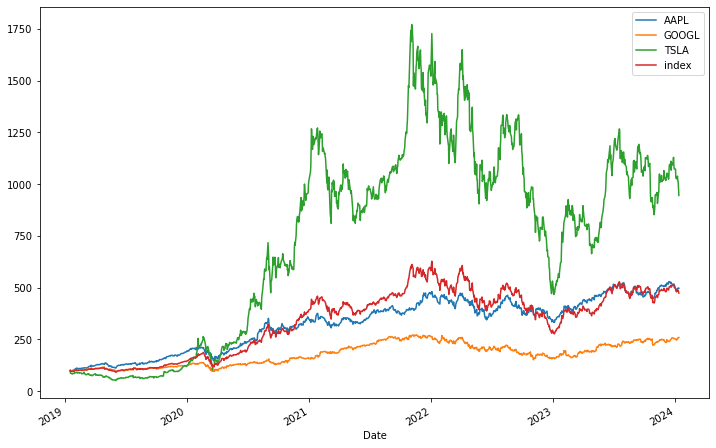

In [26]:
first_closes = adj_close.iloc[0]
normalized_prices = 100 * adj_close.div(first_closes, axis=1)
normalized_prices.plot(figsize=(12,8))

## GroupBy and Resample methods for computing statistics for groups of observations

Sometimes we want to group data based on some rule and compute, e.g., counts or means for these observations

For example, I could compute how many *observations* I have each month in the data.
- I first create a new column that contains just the month
- I then GroupBy by this column

Note: There is a lot going on on the first line where I create the yyyymm variable

In [27]:
returns['yyyymm'] = returns.index.strftime('%Y-%m')
returns.head()

,AAPL,GOOGL,TSLA,index,yyyymm
Date,,,,,
2019-01-17,NaN,NaN,NaN,NaN,2019-01
2019-01-18,0.006159,0.007442,-0.129711,-0.020466,2019-01
2019-01-22,-0.022446,-0.025892,-0.011050,-0.022103,2019-01
2019-01-23,0.004044,0.005359,-0.037903,-0.002870,2019-01
2019-01-24,-0.007926,-0.000378,0.013631,-0.000470,2019-01


In [28]:
returns.groupby('yyyymm')

In [29]:
returns.groupby('yyyymm')[['AAPL','GOOGL']]

In [30]:
grp = returns.groupby('yyyymm')[['AAPL','GOOGL']]
grp.count().head()

,AAPL,GOOGL
yyyymm,,
2019-01,9,9
2019-02,19,19
2019-03,21,21
2019-04,21,21
2019-05,22,22


In [31]:
grp.std().head()

,AAPL,GOOGL
yyyymm,,
2019-01,0.027628,0.018504
2019-02,0.010176,0.011673
2019-03,0.014017,0.012135
2019-04,0.009101,0.018704
2019-05,0.021190,0.014972


If we have datetimes in the index, as we have here, we can RESAMPLE the data to different frequencies such as W=Week or M=Month

If I resample, I can then take, e.g., means or sums of the data for each group or take the last value. To get the last price each month, we can write:

In [32]:
returns.resample('M').last().head()

,AAPL,GOOGL,TSLA,index,yyyymm
Date,,,,,
2019-01-31,0.007201,0.025410,-0.005668,0.013583,2019-01
2019-02-28,-0.009836,0.003259,0.016331,0.000932,2019-02
2019-03-31,0.006518,0.003941,0.004450,0.004973,2019-03
2019-04-30,-0.019256,-0.075019,-0.011513,-0.046053,2019-04
2019-05-31,-0.018116,-0.013296,-0.016258,-0.015489,2019-05


## Creating, merging and joining data

We will work with existing data in this course

In terms of **creating** dataframes, it is useful to know that those can be created from all kinds of underlying data such as dictionaries

We often want to join different pieces of information together. When we merge or join data, we need to specify:

1. What are the variables or indexes by which we want to join and
2. What logic do we want to follow for keeping observations

We use commands merge, join, and concat for combining data

Because we will do this when we combine price information with accounting information, I won't give examples here

## Some statistics

Pandas has built-in methods for computing some basic statistics:

In [33]:
print(returns.count())
print(returns.mean())
print(returns.std())
print(returns.skew())

AAPL      1255
GOOGL     1255
TSLA      1255
index     1255
yyyymm    1256
dtype: int64
AAPL     0.001480
GOOGL    0.000960
TSLA     0.002621
index    0.001521
dtype: float64
AAPL     0.020103
GOOGL    0.019982
TSLA     0.040748
index    0.023618
dtype: float64
AAPL     0.045692
GOOGL   -0.076603
TSLA     0.082219
index   -0.299517
dtype: float64


If you wanted to compute the return on a trading rule that is always long Apple \\$1 and short Google \\$1, rebalancing daily, we could compute the **Sharpe ratio** of this strategy with a few lines of code

In [34]:
strategy_return = returns['AAPL'] - returns['GOOGL']
m = 252 * strategy_return.mean()
s = np.sqrt(252) * strategy_return.std()
sr = m / s
print(f'The annualized Sharpe ratio to three decimal points is {sr:.3f}')

The annualized Sharpe ratio to three decimal points is 0.511


## A practical example of the power of Pandas and method chaining

The benefit of Pandas is that you can get *a lot* done with just one line of code through method chaining

For example, if I start with the original data and I want to plot rolling 21-day volatilities for just AAPL and GOOGL, I could do the following:

<AxesSubplot:xlabel='Date'>

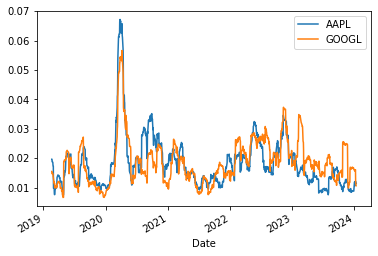

In [35]:
data = stock_data.xs('Adj Close', axis=1, level=0)
data = data[['AAPL','GOOGL']]
ret = data.pct_change()
vols = ret.rolling(window=21).std()
vols.plot()

But I know the basic ingredients and am fluent enough in it, it might make sense to do this on just one line

We read this from left to right so this isn\'t that bad. When we have a dot (.), we know that something is being applied to whatever was created on the left

<AxesSubplot:xlabel='Date'>

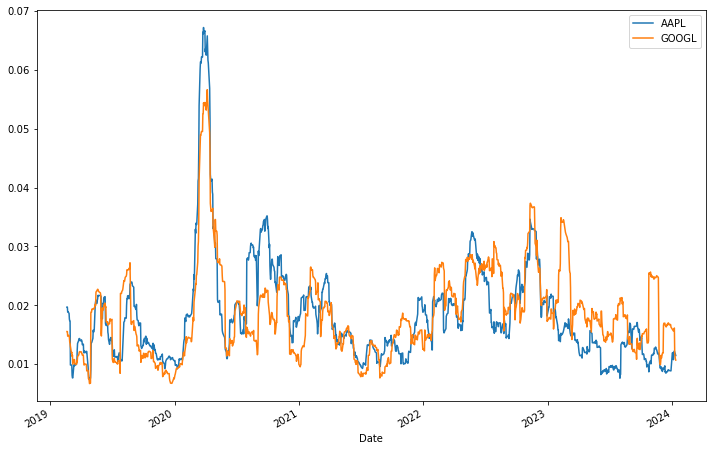

In [36]:
stock_data.xs('Adj Close', axis=1, level=0)[['AAPL','GOOGL']].pct_change().rolling(window=21).std().plot(figsize=(12,8))

This is pretty readable. However, please do **not** use method chaining when it hurts readability 

In [37]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


## Saving and loading data

Pandas supports multiple data formats, such as csv and Excel, with built-in methods. With these methods you can specify how the input data need to be interpreted.

There are other formats such as pickle, json, and parquet for storing objects.
- Every file format has different pros and cons

Pickle is very popular because it is a really simple way of storing dictionaries and DataFrames
- A popular use case would be organize all your data into a big dictionary of, e.g., DataFrames and other objects and then save that as a pickle file
- When you read it, you'll have exactly the same dictionary back
- If you were to use, e.g., a CSV file, you would need redefine the indexes and every piece of data would likely be in its own file

The downside of pickle is that it has backwards-compatibility issues:
- A pickle file created in one version of Python/Pandas might not be (= typically is not) readable in another version 
- So be careful if you want to share files
- In an enterprise applications the development environment is typically managed so that *everything* in your Python installation stays the same
  - In this case, you don't have to worry about incompatibility
  - The only issue is that when you want to transition to a newer environment, you may need to port over any pickle files on which you rely
  
If I wanted to write and read dataframes directly from Pandas, it would be really simple:

In [38]:
returns.to_pickle('./returns.pkl')
returns.head()

,AAPL,GOOGL,TSLA,index,yyyymm
Date,,,,,
2019-01-17,NaN,NaN,NaN,NaN,2019-01
2019-01-18,0.006159,0.007442,-0.129711,-0.020466,2019-01
2019-01-22,-0.022446,-0.025892,-0.011050,-0.022103,2019-01
2019-01-23,0.004044,0.005359,-0.037903,-0.002870,2019-01
2019-01-24,-0.007926,-0.000378,0.013631,-0.000470,2019-01


In [39]:
returns2 = pd.read_pickle('./returns.pkl')
returns2.head()

,AAPL,GOOGL,TSLA,index,yyyymm
Date,,,,,
2019-01-17,NaN,NaN,NaN,NaN,2019-01
2019-01-18,0.006159,0.007442,-0.129711,-0.020466,2019-01
2019-01-22,-0.022446,-0.025892,-0.011050,-0.022103,2019-01
2019-01-23,0.004044,0.005359,-0.037903,-0.002870,2019-01
2019-01-24,-0.007926,-0.000378,0.013631,-0.000470,2019-01
